
The learning wheels are off, let's prepare our data just like how professionals do. 

## 1. Exploratory Analysis
We will start by exploring the data set to gain some insight.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

Let's read the data set and use some Pandas functionality to see what is inside.

In [2]:
house_df = pd.read_csv('real_estate_data.csv')
house_df.shape

(1883, 26)

In [3]:
house_df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [4]:
house_df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
house_df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [6]:
house_df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Now, let's use Seaborn plots to visualize data.

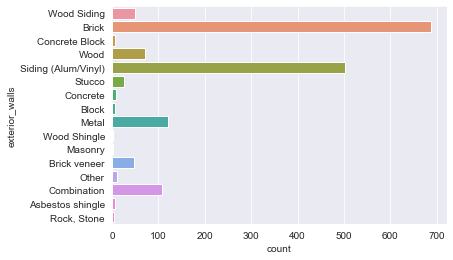

In [7]:
sns.countplot(y='exterior_walls', data=house_df)
plt.show()

<AxesSubplot:xlabel='tx_price', ylabel='property_type'>

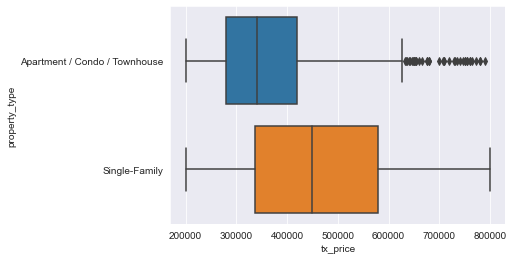

In [8]:
sns.boxplot(y='property_type', x='tx_price', data=house_df)

In [9]:
house_df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


We can also perform some basic analysis to see how each column is related to each other.

In [10]:
correlations = house_df.corr()*100.

<AxesSubplot:>

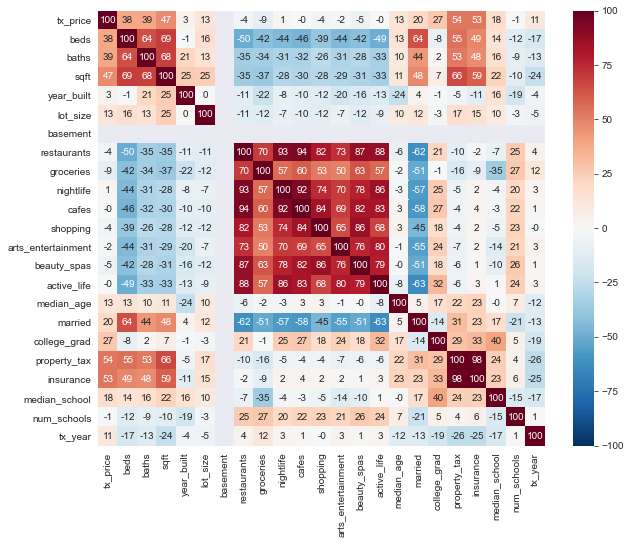

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(correlations, vmin=-100, annot=True, fmt = '0.0f', cmap='RdBu_r')

We can also visualize the contents of the "object"/categorical columns.

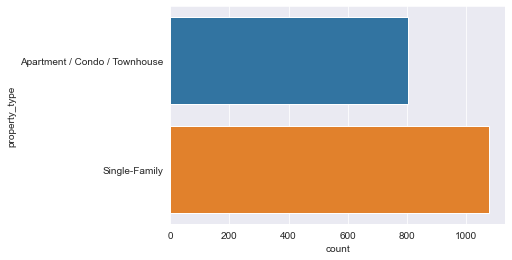

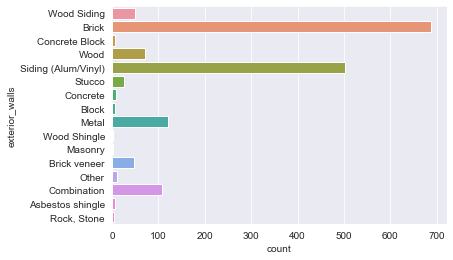

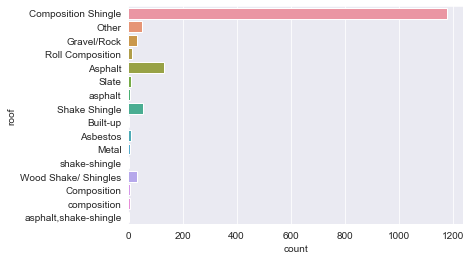

In [12]:
for feature in house_df.dtypes[house_df.dtypes == 'object'].index:
    fig = plt.figure()
    sns.countplot(y=feature, data=house_df)
    plt.show()

Finally, let's have a look at how we can use lmplots to see if there are any immediate "clusters" in the data.

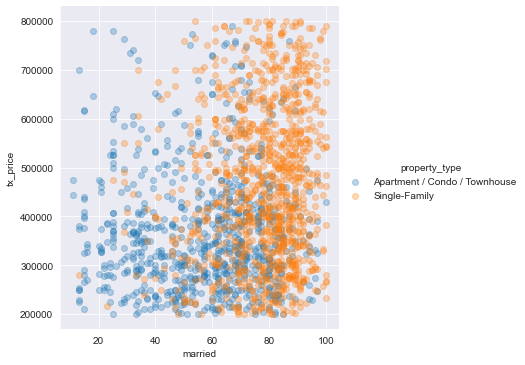

In [13]:
sns.lmplot(x='married',
           y='tx_price',
           hue='property_type',
           data=house_df,
           fit_reg=False,
           scatter_kws={'alpha':0.3})
plt.show()

## 2. Data Cleaning
Through exploratory analysis, we gained some valuable insight about the data. Now let's use that insight to remove clean the data set.

### Clean duplicate entires
Our first aim is to remove duplicate entries. This can be easily done by using the Pandas function "drop_duplicates".

In [14]:
print(house_df.shape)

(1883, 26)


In [15]:
house_df = house_df.drop_duplicates()
print(house_df.shape)

(1883, 26)


Our data luckily didn't have any duplicates, but this is not always the case.
### Handle NaNs
NaNs, our old nemesis. This is what we should check for next.

In [16]:
print(house_df.basement.unique())

[nan  1.]


In [17]:
house_df.basement.fillna(0, inplace=True)
print(house_df.basement.unique())

[0. 1.]


Hey, there were more columns with NaNs, why didn't we handle them as well?
### Fix Categorical Errors
Let's first understand how categorical errors can rise and how they can be fixed before we dive into fixing NaNs in categorical data.

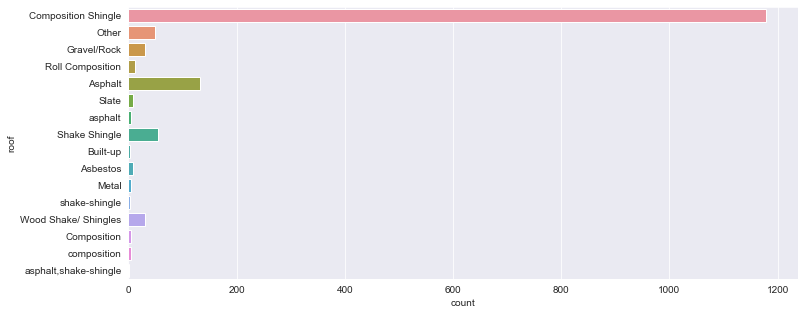

In [18]:
fig = plt.figure(figsize=(12,5))
sns.countplot(y='roof', data=house_df)
plt.show()

First, the obvious typos.

In [19]:
house_df.roof.replace('composition', 'Composition', inplace=True)

In [20]:
house_df.roof.replace('asphalt', 'Asphalt', inplace=True)

Second, the not so obvious entries. This is where us being human helps.

In [21]:
house_df.roof.replace(['shake-shingle','asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

Let's check our clean roof data.

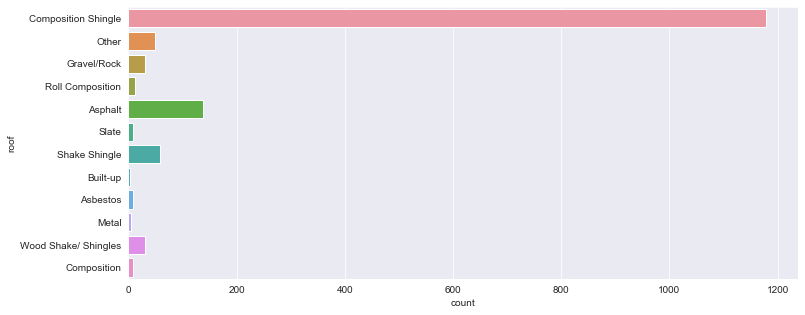

In [22]:
fig = plt.figure(figsize=(12,5))
sns.countplot(y='roof', data=house_df)
plt.show()

In [23]:
house_df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

In [24]:
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
house_df.roof.replace(other_roofs, 'Other', inplace=True)

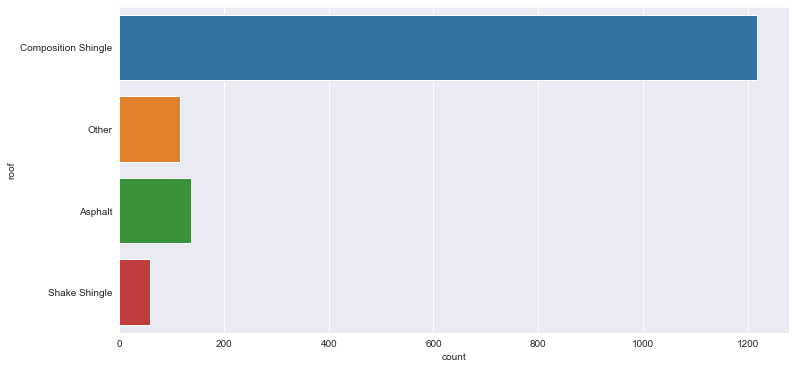

In [25]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='roof', data=house_df)
plt.show()

Now, let's fix our exterior walls 🤪.

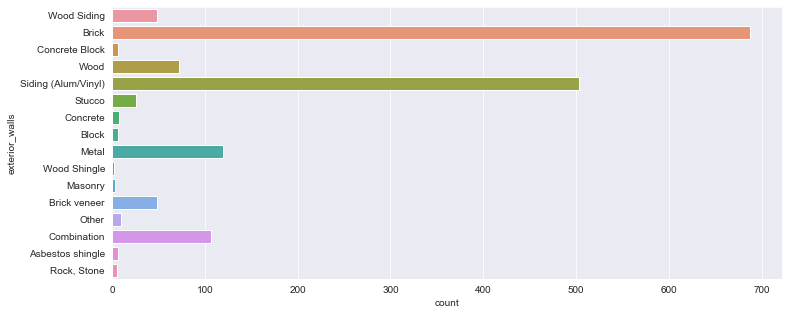

In [26]:
fig = plt.figure(figsize=(12,5))
sns.countplot(y='exterior_walls', data=house_df)
plt.show()

What needs fixing here?

In [27]:
house_df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

In [28]:
house_df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

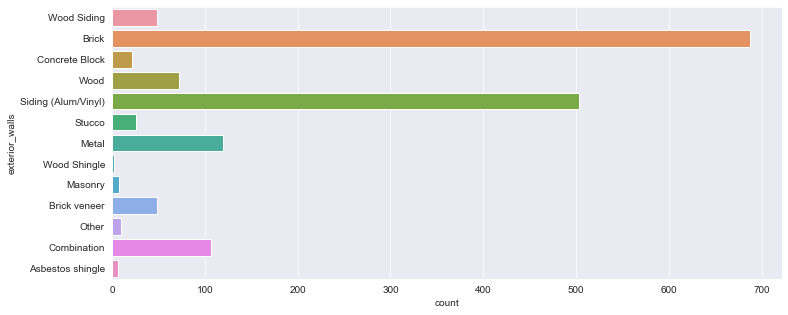

In [29]:
fig = plt.figure(figsize=(12,5))
sns.countplot(y='exterior_walls', data=house_df)
plt.show()

In [30]:
house_df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [31]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

In [32]:
house_df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

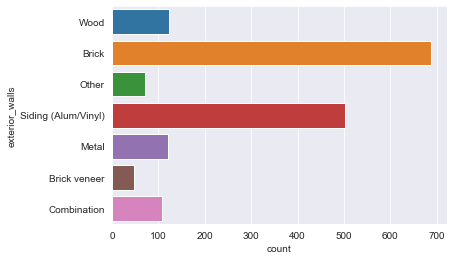

In [33]:
plt.figure()
sns.countplot(y='exterior_walls', data=house_df)
plt.show()

### Handle Missing Data
Okay, now let's see why we didn't just fill our Missing values for the roof and exterior walls.

In [34]:
house_df['exterior_walls'].fillna('Missing', inplace=True)
house_df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls      0
roof              354
dtype: int64

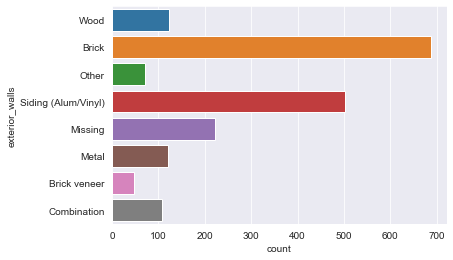

In [35]:
plt.figure()
sns.countplot(y='exterior_walls', data=house_df)
plt.show()

In [36]:
house_df['roof'].fillna('Missing', inplace=True)
house_df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

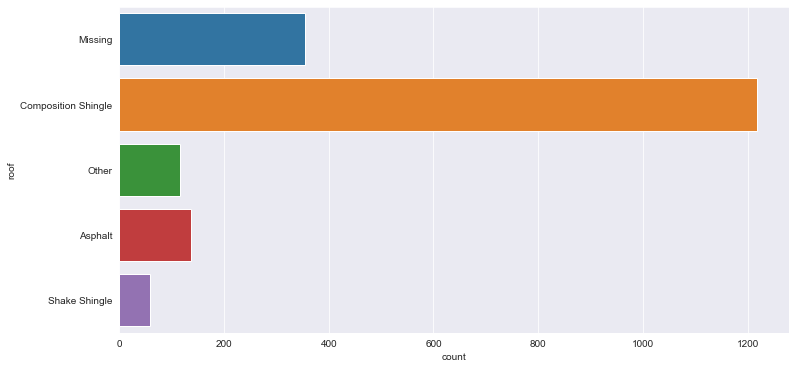

In [37]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='roof', data=house_df)
plt.show()

### Remove Unphysical Data
Now that we handled categorical values, let's check for unphysical data.

In [38]:
house_df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,0.879979,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.325073,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.000000,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.000000,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.000000,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


Which categories seem suspicious to you?

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lot_size'>

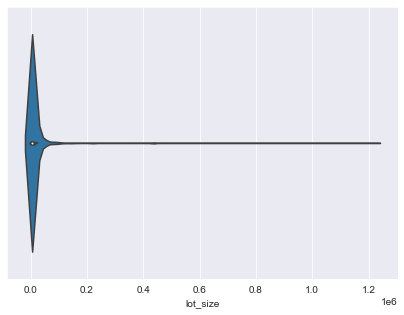

In [39]:
fig = plt.figure(figsize=(7,5))
sns.violinplot('lot_size', data = house_df)

In [40]:
house_df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [41]:
house_df = house_df.drop(index=102)
print(np.shape(house_df))

(1882, 26)


In [42]:
house_df.lot_size.sort_values(ascending=False).head()

1111    436471
1876    436035
1832    436035
1839    435600
1115    435600
Name: lot_size, dtype: int64

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lot_size'>

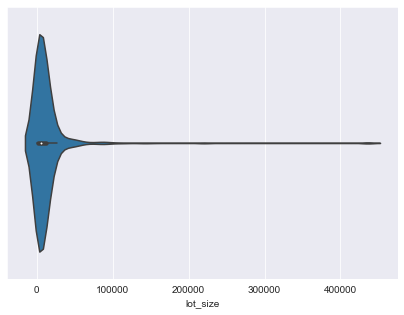

In [43]:
fig = plt.figure(figsize=(7,5))
sns.violinplot('lot_size', data = house_df)

### Final Check
Let's make sure we have no NaNs.

In [44]:
house_df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [45]:
house_df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Seems OK. Let's move on.
## 3. Feature Engineering
Okay now, here is the fun part of Data Preparation. Let's imagine being a realtor, and we have someone looking for a 2br+1ba.

In [46]:
# Based on the tasks
house_df['two_and_one'] = ((house_df.beds == 2) & (house_df.baths == 1)).astype(int)

Or someone looking to buy a new house.

In [47]:
house_df['newer_house'] = ((house_df.year_built >= 2010)).astype(int)

In [48]:
house_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0


A family looking for a house in a good school district?

In [49]:
house_df['school_score'] = house_df.num_schools * house_df.median_school
print(house_df.school_score.mean())

18.018597236981932


A bank hoping to find older houses?

In [50]:
house_df['property_age'] = house_df.tx_year - house_df.year_built

In [51]:
house_df.property_age.describe()

count    1882.000000
mean       24.126461
std        21.153271
min        -8.000000
25%         6.000000
50%        20.000000
75%        38.000000
max       114.000000
Name: property_age, dtype: float64

Wait, WHAT?

In [52]:
house_df = house_df[house_df.property_age >=0]

In [53]:
np.shape(house_df)

(1863, 30)

Data cleaning never ends...
## 4. Dimensionality Reduction
Now, we are in pretty good shape to start exploring how we can reduce the dimensionality of our data.

In [54]:
house_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10


In [55]:
#Import more libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [56]:
reduced_df = house_df.select_dtypes(exclude=['object'])

In [57]:
reduced_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10


Normally, we will use an encoder or dummies to transform categorical columns at this step. 

In [58]:
house_encoder = LabelEncoder()

In [59]:
house_df['roof_encoded'] = house_encoder.fit_transform(np.asarray(house_df.roof).reshape(-1,1))
house_df['exterior_walls_encoded'] = house_encoder.fit_transform(np.asarray(house_df.exterior_walls).reshape(-1,1))

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [60]:
house_df.head() # You can also replace or drop the other categorical values. I recommend creating a copy and modifying it.

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,roof_encoded,exterior_walls_encoded
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0,2,7
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41,1,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49,2,7
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5,2,7
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10,2,0


Let's go back to our numerical data set and start with scaling the data.

In [61]:
scaler = StandardScaler()

In [62]:
reduced_df_scaled = scaler.fit_transform(reduced_df)

In [63]:
print(reduced_df_scaled)

[[-0.838106   -2.26238072 -1.68460809 ...  5.57859209  1.39502728
  -1.15723463]
 [-1.36109676 -2.26238072 -1.68460809 ... -0.1792567  -1.38971258
   0.78752143]
 [-0.94323143 -2.26238072 -1.68460809 ... -0.1792567   0.93090397
   1.16698603]
 ...
 [ 1.16652715  1.49413914  3.70047234 ... -0.1792567  -1.54442035
  -0.96750233]
 [ 2.2204178   1.49413914  3.70047234 ... -0.1792567  -1.23500481
  -1.0149354 ]
 [ 2.0563035   1.49413914  3.70047234 ... -0.1792567   1.39502728
   1.54645063]]


Let's use PCA to see which variables define the variance of the data best.

In [64]:
pca = PCA()

In [65]:
pca.fit(reduced_df_scaled)

PCA()

In [66]:
PC_items = pca.transform(reduced_df_scaled)

PC_items[:5]

array([[ 5.29208579e+00, -1.42205500e-01, -4.49428693e+00,
        -2.44830171e-01,  3.71452041e+00,  2.79036901e-01,
         7.75424704e-01, -7.50026963e-01, -1.10113709e+00,
         2.41773665e+00,  2.52916311e+00,  2.26944549e-01,
         3.48030479e-01, -1.44309086e+00, -7.84007183e-01,
         1.46060827e+00,  2.73127022e-01, -2.44356093e-01,
         7.60552387e-01, -5.86302458e-01, -2.48927986e-01,
         2.97612719e-01,  5.17358299e-01, -6.55326108e-01,
        -6.02206191e-02,  1.21561548e-02,  1.17369679e-15],
       [ 3.16935073e+00, -2.86612584e+00,  1.39009014e+00,
         4.31963362e-01, -1.15590697e+00, -8.46327636e-01,
        -7.69262849e-02, -1.61144563e-01, -7.97775165e-01,
         1.21997984e-01,  2.71846829e-02,  1.50838343e+00,
         4.53053846e-01, -1.09686467e+00, -8.49260114e-01,
         1.06311751e+00, -1.97965599e-01, -5.37305409e-01,
        -2.21843235e-01, -1.15191194e+00,  3.53536705e-01,
         3.13208841e-01, -3.52416495e-01,  5.82244974e-

In [67]:
print(pca.explained_variance_ratio_.sum()) # to explain the variance of the data set captured with principal components

0.9999999999999999


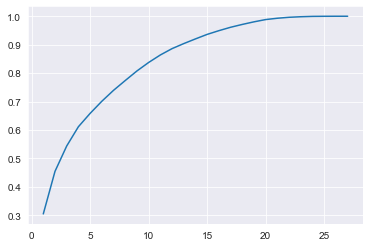

In [68]:
#np.cumsum(pca.explained_variance_ratio_)

plt.figure()

plt.plot(np.arange(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.show()

How many PCs we need to describe the variance of the data set?

In [69]:
np.cumsum(pca.explained_variance_ratio_)[7]

0.7739610228845908

In [70]:
houses_pca = pd.DataFrame(PC_items)  # We can create a new dataframe with the PCs.

In [71]:
houses_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

In [72]:
houses_pca.index = reduced_df.index

In [73]:
houses_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,5.292086,-0.142206,-4.494287,-0.244830,3.714520,0.279037,0.775425,-0.750027,-1.101137,2.417737,2.529163,0.226945,0.348030,-1.443091,-0.784007,1.460608,0.273127,-0.244356,0.760552,-0.586302,-0.248928,0.297613,0.517358,-0.655326,-0.060221,0.012156,1.173697e-15
1,3.169351,-2.866126,1.390090,0.431963,-1.155907,-0.846328,-0.076926,-0.161145,-0.797775,0.121998,0.027185,1.508383,0.453054,-1.096865,-0.849260,1.063118,-0.197966,-0.537305,-0.221843,-1.151912,0.353537,0.313209,-0.352416,0.582245,0.016591,-0.008667,2.493773e-16
2,8.393869,0.158455,-0.921591,-1.244415,0.987849,0.443397,-0.775881,1.272895,0.606404,-0.670941,1.376108,0.212257,0.423036,0.457495,-0.930056,0.640858,1.014417,0.279922,-0.320292,-0.738297,-0.107878,-0.560013,-0.456110,-0.008443,0.093535,0.026068,-4.825733e-16
3,8.147429,1.672049,-3.336047,-1.041582,-0.119924,0.610788,0.379716,1.410706,-0.410556,-0.888883,1.029934,-0.011092,0.328121,-0.345029,-0.392668,0.108372,0.832226,0.334279,0.849684,-0.215988,-0.580785,0.296728,0.521829,0.185389,0.034128,-0.004551,4.156392e-16
4,6.510836,-0.217058,-3.011427,-1.808492,-0.341066,0.270054,0.361310,0.671802,-0.271748,-0.867797,1.423414,-0.566770,0.212273,0.082086,-0.606645,-1.126395,0.521074,0.248554,0.453054,-0.378844,-0.528827,0.660996,-0.267405,0.204990,0.092000,0.023905,3.471017e-16


In [74]:
reduced_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10


How were the PCs correlated to each other?

In [75]:
pca_correlations = houses_pca.corr()

<AxesSubplot:>

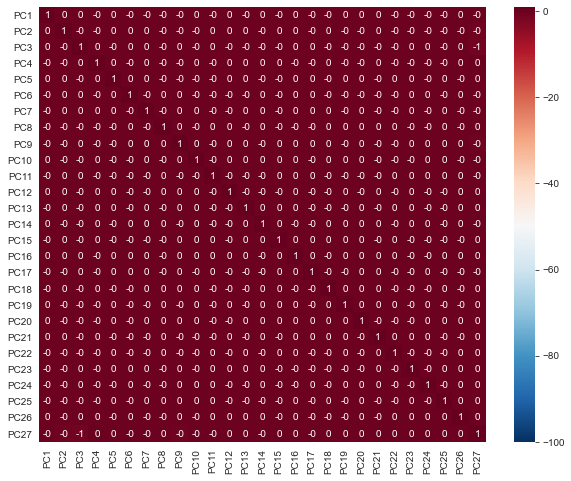

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(pca_correlations, vmin=-100, annot=True, fmt = '0.0f', cmap='RdBu_r')

To reduce the data set we pick the n_components we decide is sufficent to describe the data set variability.

In [77]:
pca = PCA(n_components=7)

PC_items = pca.fit_transform(reduced_df_scaled)

In [78]:
# Creating a reduced data set
houses_reduced_pca = pd.DataFrame(PC_items) 

houses_reduced_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

houses_reduced_pca.index = reduced_df.index

houses_reduced_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.292087,-0.142175,-4.494273,-0.244707,3.715850,0.283279,0.772395
1,3.169351,-2.866134,1.390158,0.431777,-1.154996,-0.847882,-0.076746
2,8.393868,0.158445,-0.921555,-1.244555,0.989192,0.440792,-0.774320
3,8.147429,1.672076,-3.336048,-1.041459,-0.118557,0.614151,0.377563
4,6.510836,-0.217057,-3.011396,-1.808570,-0.340006,0.269447,0.361573


In [79]:
np.shape(pca.components_)

(7, 27)

In [80]:
pca.explained_variance_ratio_ # Each component individually.

array([0.3049548 , 0.14967463, 0.0891627 , 0.06777364, 0.04684533,
       0.04264567, 0.03843641])

Let's see how the PCs look like on the data set.

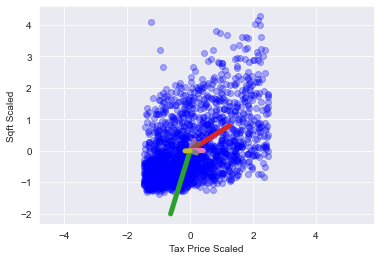

In [81]:
PC = pca.transform(reduced_df_scaled)

plt.figure()

plt.scatter(reduced_df_scaled[:,0], reduced_df_scaled[:,3], alpha=0.3, color='b')

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")

plt.axis('equal')
plt.xlabel('Tax Price Scaled')
plt.ylabel('Sqft Scaled')

plt.show()

Now let's see how the PCAs can be used.

In [84]:
print('Reduced df: ', np.shape(reduced_df), 'Reduced pca: ', np.shape(houses_reduced_pca))

Reduced df:  (1863, 27) Reduced pca:  (1863, 7)


We can merge the reduced_df, and houses_reduced_pca. 

In [87]:
final_reduced_pca_df = reduced_df.join(houses_reduced_pca)

final_reduced_pca_df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_one,newer_house,school_score,property_age,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,27.0,0,5.292087,-0.142175,-4.494273,-0.244707,3.715850,0.283279,0.772395
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,9.0,41,3.169351,-2.866134,1.390158,0.431777,-1.154996,-0.847882,-0.076746
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,24.0,49,8.393868,0.158445,-0.921555,-1.244555,0.989192,0.440792,-0.774320
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,27.0,5,8.147429,1.672076,-3.336048,-1.041459,-0.118557,0.614151,0.377563
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,27.0,10,6.510836,-0.217057,-3.011396,-1.808570,-0.340006,0.269447,0.361573


You can then create, for example a k_means clusterer, scale, split, and pass the final_reduced_pca_df. <br>
👏 Congratulations, you have completed the Data Preparation Workbook!